<a href="https://colab.research.google.com/github/minhajiumoora/Data_Visualization_Projects/blob/main/HealthCare_DataScience_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Healthcare Data Science Project - Umoora Minhaji

# **Context**

COVID-19 (coronavirus disease 2019) is a disease caused by a virus named SARS-CoV-2. It can be very contagious and spreads quickly.COVID-19 most often causes respiratory symptoms that can feel much like a cold, the flu, or pneumonia. COVID-19 may attack more than your lungs and respiratory system. Other parts of your body may also be affected by the disease. Most people with COVID-19 have mild symptoms, but some people become severely ill. The majority of COVID-19 virus infections result in mild to moderate respiratory disease and recovery without the need for special care. Serious illness is more common in the elderly and in those with underlying medical conditions such cancer, diabetes, cardiovascular disease, and chronic respiratory diseases.

One of the biggest issues facing healthcare providers during the pandemic has been the lack of medical resources and an effective plan for allocating them. Knowing what kind of resource a person would need at these trying times, either before or after a positive test, will be quite helpful to the authorities as they would be able to procure and arrange for resources necessary to save the Life of that patient.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.




---



Below are the necessary libraries which I have imported and feel might be using throughout the project. However, I might import additional libraries as required while going forward the project.


In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

The below lines of code is used to create a dataframe from the Healthcare Dataset provided.

In [173]:
df1 = pd.read_csv("/content/Covid_Dataset.csv")
df1.head()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03-05-2020,3,1,65,2,0,...,0,0,1,0,0,0,0,0,3,0
1,2,1,2,1,03-06-2020,3,1,72,3,0,...,0,0,1,0,0,1,1,0,5,0
2,2,1,2,2,09-06-2020,1,2,55,3,1,...,0,0,0,0,0,0,0,0,3,1
3,2,1,1,1,12-06-2020,3,2,53,2,0,...,0,0,0,0,0,0,0,0,7,0
4,2,1,2,1,21-06-2020,3,2,68,3,1,...,0,0,1,0,0,0,0,0,3,0


In [174]:
df1.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [175]:
for column in df1.columns:
   v = df1[column].value_counts()
   print(v)

USMER
2    112090
1     87909
Name: count, dtype: int64
MEDICAL_UNIT
4    180504
3     19175
2       169
1       151
Name: count, dtype: int64
SEX
2    104686
1     95313
Name: count, dtype: int64
PATIENT_TYPE
1    130682
2     69317
Name: count, dtype: int64
DATE_DIED
9999-99-99    158592
07-07-2020       552
16-06-2020       541
06-07-2020       537
13-07-2020       536
               ...  
20-10-2020         1
18-10-2020         1
16-10-2020         1
14-10-2020         1
12-10-2020         1
Name: count, Length: 337, dtype: int64
INTUBED
3    130682
2     50665
1     17455
4      1197
Name: count, dtype: int64
PNEUMONIA
2     152930
1      42313
99      4756
Name: count, dtype: int64
AGE
37     4572
30     4543
40     4498
35     4480
31     4461
       ... 
100      12
103       1
101       1
107       1
102       1
Name: count, Length: 105, dtype: int64
PREGNANT
3    104686
2     94004
1      1184
4       125
Name: count, dtype: int64
DIABETES
0    165406
1     34593
Name: count,

In [176]:
df1.shape


(199999, 21)

In [177]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   USMER                 199999 non-null  int64 
 1   MEDICAL_UNIT          199999 non-null  int64 
 2   SEX                   199999 non-null  int64 
 3   PATIENT_TYPE          199999 non-null  int64 
 4   DATE_DIED             199999 non-null  object
 5   INTUBED               199999 non-null  int64 
 6   PNEUMONIA             199999 non-null  int64 
 7   AGE                   199999 non-null  int64 
 8   PREGNANT              199999 non-null  int64 
 9   DIABETES              199999 non-null  int64 
 10  COPD                  199999 non-null  int64 
 11  ASTHMA                199999 non-null  int64 
 12  INMSUPR               199999 non-null  int64 
 13  HIPERTENSION          199999 non-null  int64 
 14  OTHER_DISEASE         199999 non-null  int64 
 15  CARDIOVASCULAR   

In [178]:
df1.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,1.560453,3.900170,1.523433,1.346587,2.578108,4.095105,45.317002,2.518763,0.172966,0.021925,0.031865,0.018795,0.224771,0.052340,0.025855,0.176846,0.032410,0.076065,4.006060,0.346587
std,0.496333,0.309976,0.499452,0.475884,0.656066,14.817906,17.262120,0.512581,0.378219,0.146439,0.175641,0.135801,0.417433,0.222713,0.158703,0.381539,0.177087,0.265103,1.517395,0.475884
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,4.000000,1.000000,1.000000,2.000000,2.000000,32.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,2.000000,4.000000,2.000000,1.000000,3.000000,2.000000,44.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,2.000000,4.000000,2.000000,2.000000,3.000000,2.000000,57.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
max,2.000000,4.000000,2.000000,2.000000,4.000000,99.000000,107.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000


In [179]:
df1.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [180]:
df1.duplicated().any()

True

In [181]:
df1.duplicated().sum()

125590

As we can see a majority of Data is duplicated. This might be possible due to not providing eacg patient a unique ID. Dropping duplicates will reduce our dtaa to a large extent, so we will ignore the duplicated values.

In [182]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   USMER                 199999 non-null  int64 
 1   MEDICAL_UNIT          199999 non-null  int64 
 2   SEX                   199999 non-null  int64 
 3   PATIENT_TYPE          199999 non-null  int64 
 4   DATE_DIED             199999 non-null  object
 5   INTUBED               199999 non-null  int64 
 6   PNEUMONIA             199999 non-null  int64 
 7   AGE                   199999 non-null  int64 
 8   PREGNANT              199999 non-null  int64 
 9   DIABETES              199999 non-null  int64 
 10  COPD                  199999 non-null  int64 
 11  ASTHMA                199999 non-null  int64 
 12  INMSUPR               199999 non-null  int64 
 13  HIPERTENSION          199999 non-null  int64 
 14  OTHER_DISEASE         199999 non-null  int64 
 15  CARDIOVASCULAR   

In [183]:
get_valid_dates = df1['DATE_DIED'] != '9999-99-99'
df1['has_died'] = get_valid_dates.astype(int)
df1.drop(columns=['DATE_DIED'], inplace=True)
df1.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,has_died
0,2,1,1,1,3,1,65,2,0,0,...,0,1,0,0,0,0,0,3,0,1
1,2,1,2,1,3,1,72,3,0,0,...,0,1,0,0,1,1,0,5,0,1
2,2,1,2,2,1,2,55,3,1,0,...,0,0,0,0,0,0,0,3,1,1
3,2,1,1,1,3,2,53,2,0,0,...,0,0,0,0,0,0,0,7,0,1
4,2,1,2,1,3,2,68,3,1,0,...,0,1,0,0,0,0,0,3,0,1


In [185]:
bins = [0, 18, 40, 60, 80, 100, 120]
labels = ['0', '1', '2', '3', '4', '5']
df2 = df1.copy()
# Using cut to create age groups
df2['age_group'] = pd.cut(df1['AGE'], bins=bins, labels=labels, right=False)
# Dropping the original 'age' column
df2.drop(columns=['AGE'], inplace=True)

df2.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,has_died,age_group
0,2,1,1,1,3,1,2,0,0,0,...,1,0,0,0,0,0,3,0,1,3
1,2,1,2,1,3,1,3,0,0,0,...,1,0,0,1,1,0,5,0,1,3
2,2,1,2,2,1,2,3,1,0,0,...,0,0,0,0,0,0,3,1,1,2
3,2,1,1,1,3,2,2,0,0,0,...,0,0,0,0,0,0,7,0,1,2
4,2,1,2,1,3,2,3,1,0,0,...,1,0,0,0,0,0,3,0,1,3


####Summary of the above data cleaning and preprocessing

From the data we discover that certain number of people died

##**Exploratory Data Analysis to Identify Relationships**

Conducting Exploratory data analysis is an effective way to discover patterns, locate outliers, and show relationships between variables. In subsequequent graphical analysis we will explore the relationships between the the variables in relaation to the target variable.

However, in the subsequent analysis we will graphically understand what might be or determine the cause of a covid 19 patient tested at a different degrees be at high risk of dying. In our case we have multiples of diseases and we know disease is one of the major causes of health deteriorating. Therefore, we will conduct a graphical visualisation using bar chart to compare disease and death rate of patient.

Bar chart is an effective tools against categorical variable making it easy to visualize the relationships between categorical variable. We will be exploring the relationship between in positive occurence of each variables against our target variable.

In [187]:
## Finding correlation between fields
df1.corr()["has_died"]

USMER                  -0.118563
MEDICAL_UNIT            0.104171
SEX                     0.109954
PATIENT_TYPE            0.614852
INTUBED                -0.644914
PNEUMONIA              -0.063164
AGE                     0.489716
PREGNANT                0.111552
DIABETES                0.267609
COPD                    0.129617
ASTHMA                 -0.030734
INMSUPR                 0.085032
HIPERTENSION            0.270728
OTHER_DISEASE           0.066975
CARDIOVASCULAR          0.113168
OBESITY                 0.041475
RENAL_CHRONIC           0.173375
TOBACCO                 0.022686
CLASIFFICATION_FINAL    0.016420
ICU                     0.614852
has_died                1.000000
Name: has_died, dtype: float64

#Visualizing the above Correlation Matrix

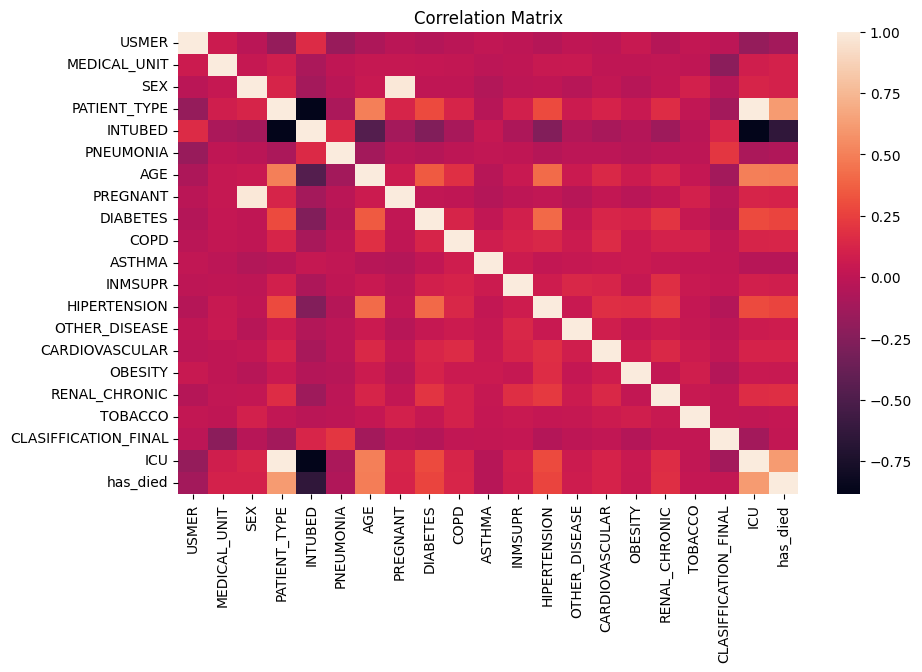

In [188]:
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr())
plt.title('Correlation Matrix')
plt.show()

###Visualizing all columns by comparing all fields with "has_died" column

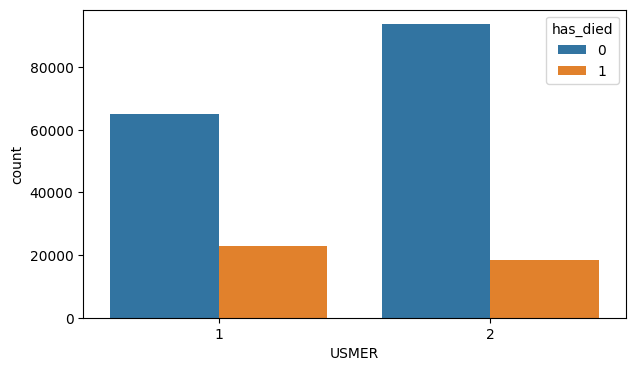

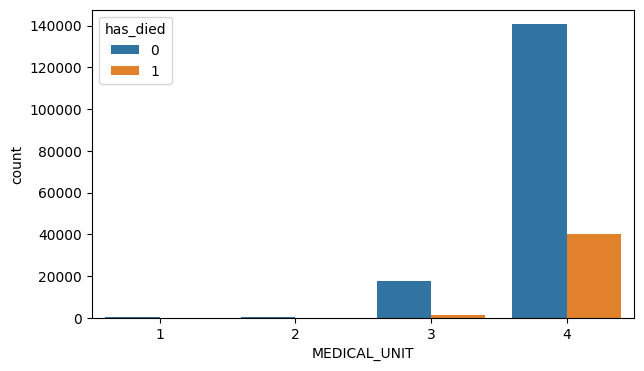

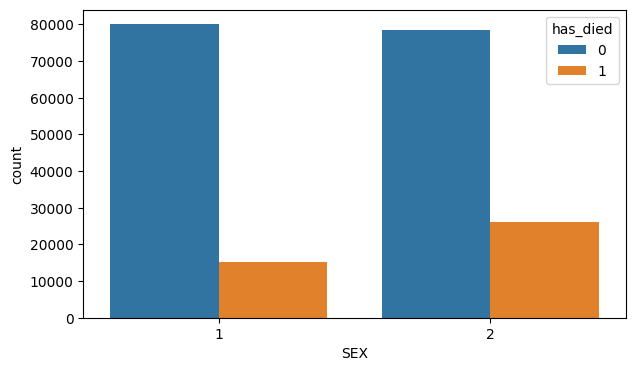

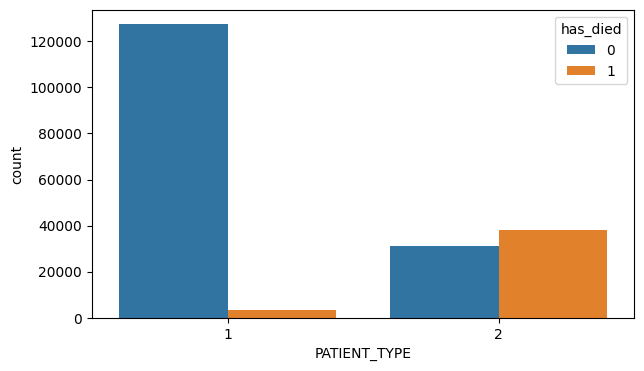

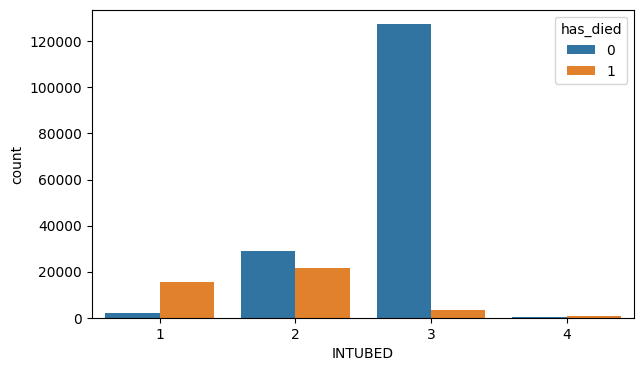

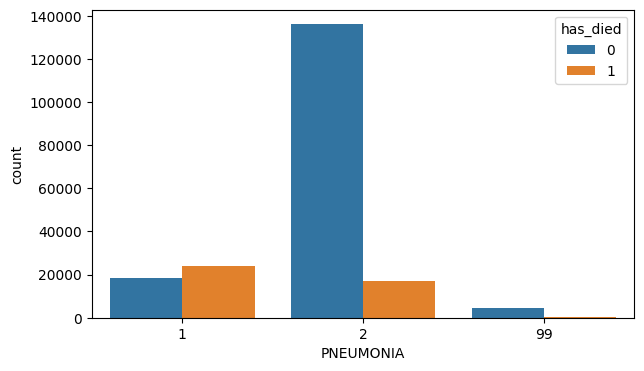

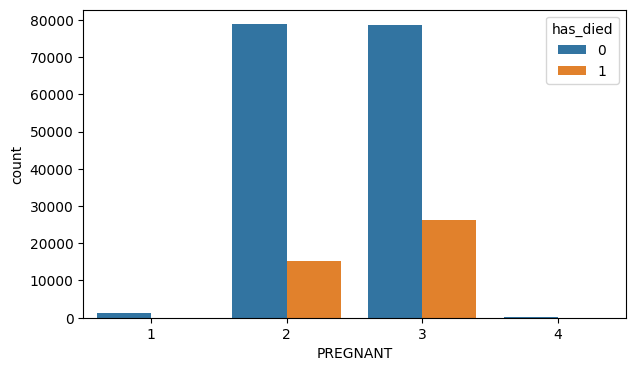

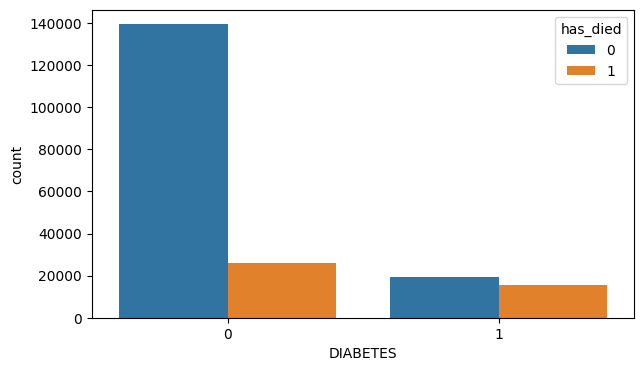

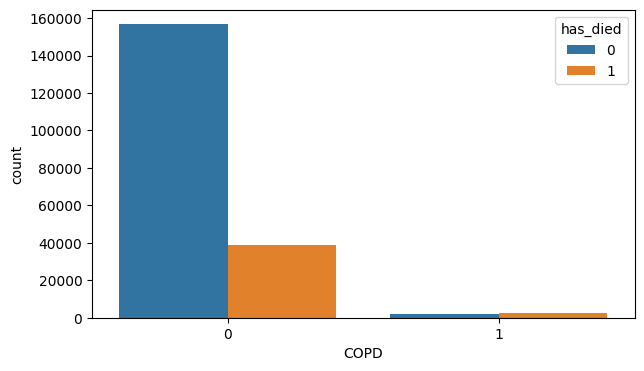

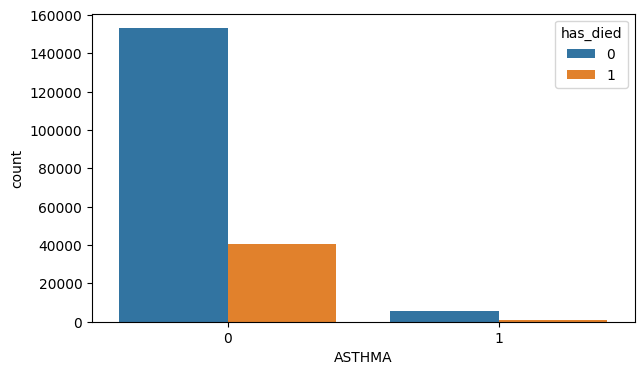

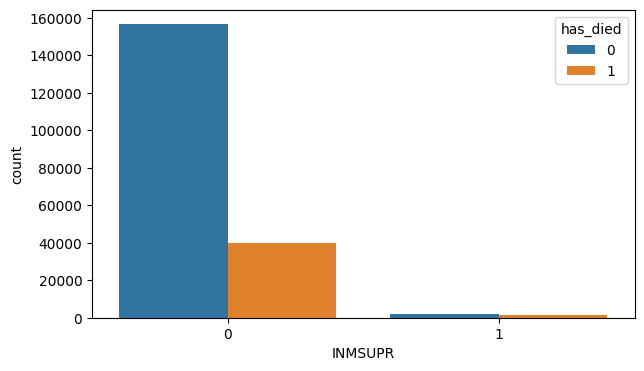

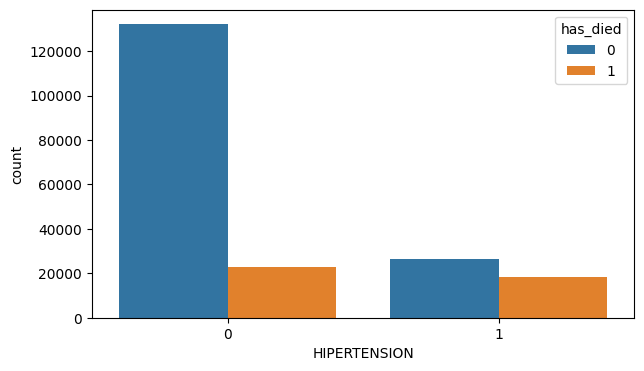

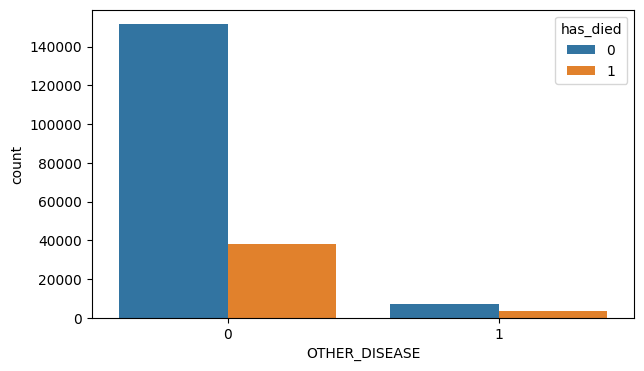

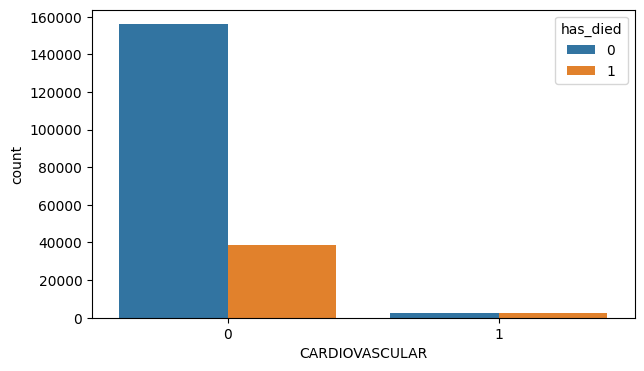

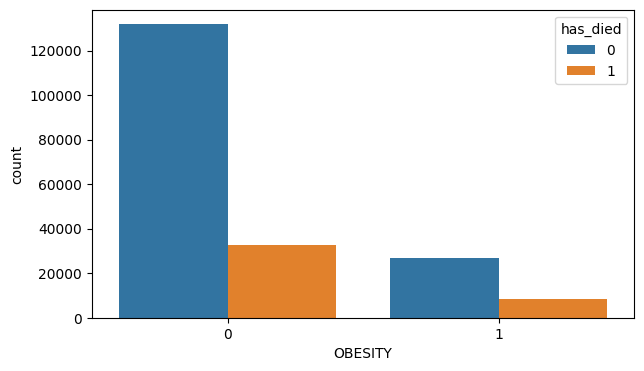

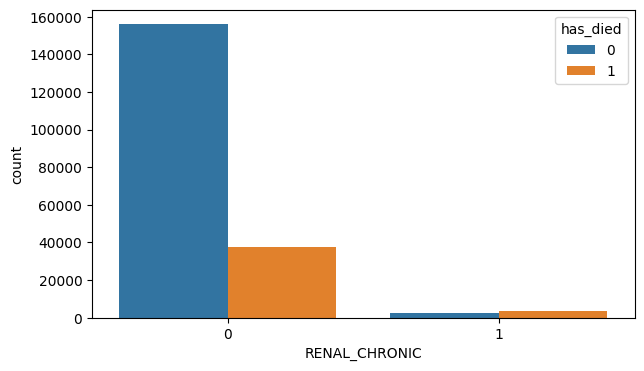

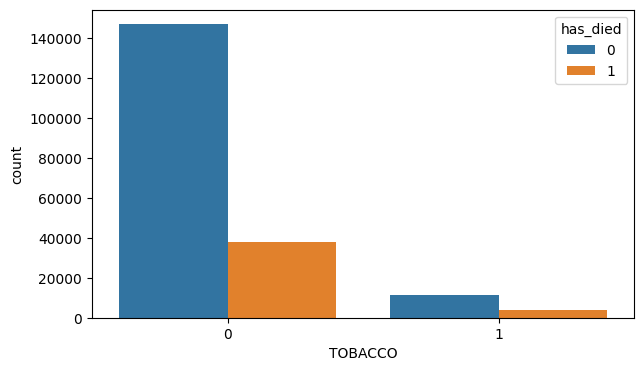

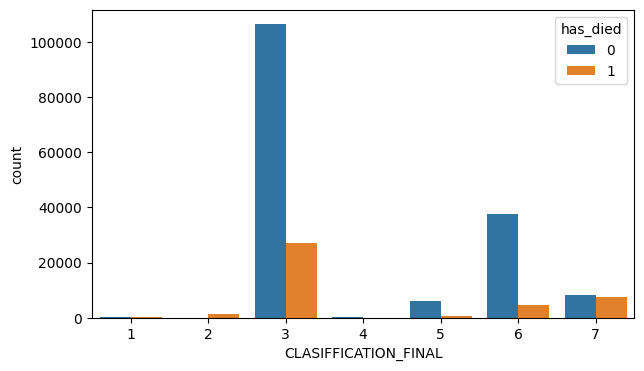

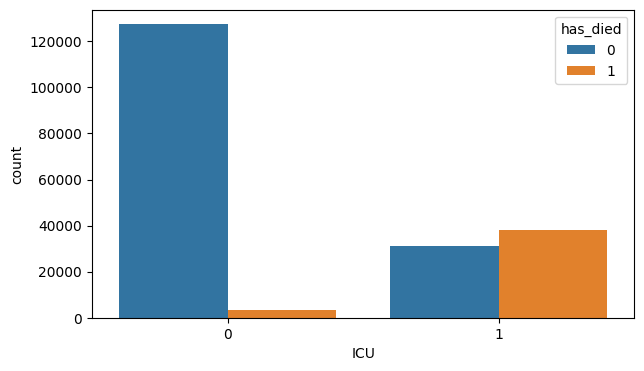

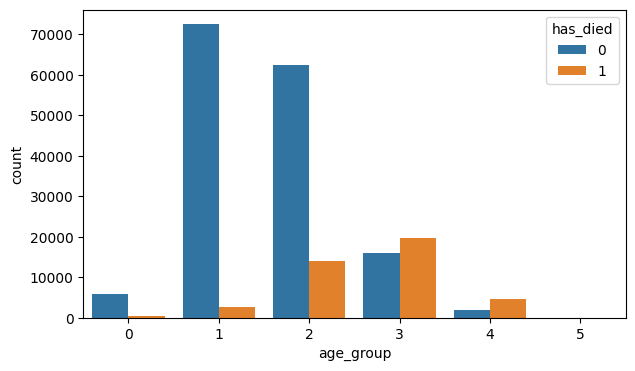

In [189]:
for column in df2.columns:
    if column != 'has_died':
      bar_data = df2.groupby([column, 'has_died']).size().reset_index(name='count')
      plt.figure(figsize=(7,4))
      sns.barplot(x= column, y='count', hue='has_died', data=bar_data)
      plt.show()


In [190]:
dead = df1["has_died"].value_counts()
print(dead)

has_died
0    158592
1     41407
Name: count, dtype: int64


###**Observation from the above Exploratory Graphs**

1. Majority of the patient tested with covid 19 in 3 degrees did not survive.

2. Age is a prime factor in the death of patients which we discover that patients with 60 years and above is likely to die of the virus

3. A patient with Hypertension, Diabetes has a low chances of survival.

4. Patients who were intubed with higher degree had more chances of survival.

5. USMER treatment of the first, second and third medical does not determine the survival of the patient

6. Patients who were returned home due to not severe symptoms surtvived.

7. Most patient acdmitted in ICU did not survive.



##**Conculsion**
After careful observation from the above data we have come to conclude that.

1. Age: the younger people survived the virus while older people did not which may be due to deteriorating in health and weakening in Immune system

2. Hypertension patients and diabetes patients also have a slim chances of survival

In [191]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
X = df1.drop(columns=['has_died'])
y = df1['has_died']

encoder = pd.get_dummies(X, drop_first=True)
encoder.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,3,1,65,2,0,0,0,0,1,0,0,0,0,0,3,0
1,2,1,2,1,3,1,72,3,0,0,0,0,1,0,0,1,1,0,5,0
2,2,1,2,2,1,2,55,3,1,0,0,0,0,0,0,0,0,0,3,1
3,2,1,1,1,3,2,53,2,0,0,0,0,0,0,0,0,0,0,7,0
4,2,1,2,1,3,2,68,3,1,0,0,0,1,0,0,0,0,0,3,0


In [192]:
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(chi2, k=10)
X_new = fs.fit_transform(encoder, y)
cols = fs.get_feature_names_out()
fs_df1 = pd.DataFrame(X_new, columns=cols)
fs_df1.shape

(199999, 10)

##**Machine learning module, encoding and model training**

###Imbalanced Dataset Treatment Using SMOTENC Technique
The Scikit-learn library has an extension library called “Imbalanced-learn” which has various methods to handle imbalanced data.

To upsample minority class samples, I use the “Synthetic Minority Over-sampling Technique for Nominal and Continuous” (SMOTENC) techniques in this project. This method is designed for categorical and continuous features to accurately upsample the dataset.

##**Spiting the data into test set and training set**

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)
numerical_features = df1[[col for col in df1.columns if col != 'has_died']]

In [194]:
from sklearn.linear_model import LogisticRegression
classifier_r = LogisticRegression(max_iter=1000)
classifier_r.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [195]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = classifier_r.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Classification Report:\n", classification_rep)
classifier_r.score(X_train, y_train)

[[29785  1902]
 [ 2380  5933]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     31687
           1       0.76      0.71      0.73      8313

    accuracy                           0.89     40000
   macro avg       0.84      0.83      0.83     40000
weighted avg       0.89      0.89      0.89     40000



0.8929305808161301

In [196]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [197]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Classification Report:\n", classification_rep)
classifier.score(X_train, y_train)

[[30041  1646]
 [ 2292  6021]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     31687
           1       0.79      0.72      0.75      8313

    accuracy                           0.90     40000
   macro avg       0.86      0.84      0.85     40000
weighted avg       0.90      0.90      0.90     40000



0.950680941755886

In [199]:
feature_importances = classifier.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

<ipython-input-200-4b9cca6c901c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


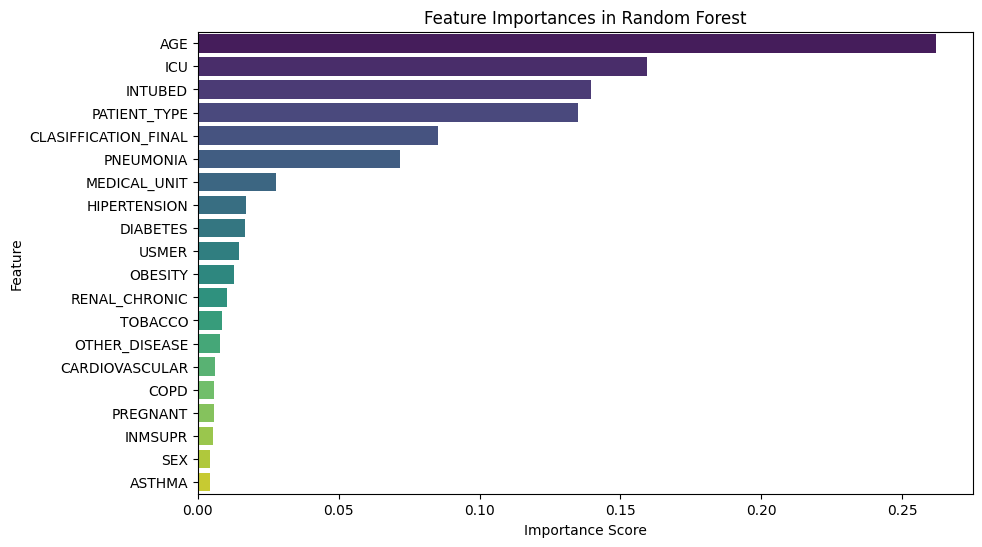

In [200]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importances in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

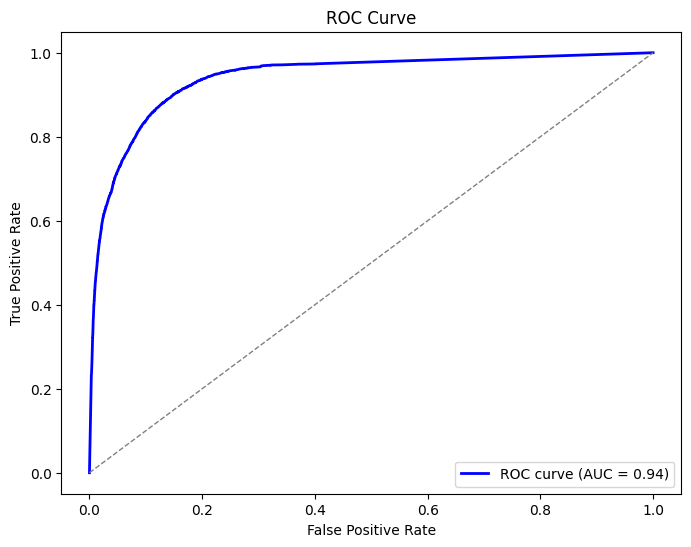

In [202]:
y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # False positive rate, true positive rate, thresholds
roc_auc = auc(fpr, tpr)  # Area under the curve

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Line representing random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()  # Display the plot

## **Encoding dataset for development and model deployment**

In [203]:
import joblib
from sklearn.preprocessing import OrdinalEncoder

new_feature_df = df1[['USMER', 'SEX', 'PATIENT_TYPE', 'CLASIFFICATION_FINAL',
                             'INTUBED', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'CARDIOVASCULAR',
                             'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU', 'AGE']]

oencoder = OrdinalEncoder()
encoded_df = pd.DataFrame(oencoder.fit_transform(new_feature_df))
encoded_df.columns = new_feature_df.columns

# Save the ordinal encoder object for inference pipeline
joblib.dump(oencoder, 'ordinal_encoder.joblib')

['ordinal_encoder.joblib']